# Data Analysis

In this notebook, we will try to understand our dataset to be able to perform easily recommandation algorithms.

In this section, we will analyze the Food.com dataset to understand its characteristics, including the number of users, items (recipes), sparsity, and the type of feedback available.

In [5]:
import os
import pandas as pd

dataset_path = os.path.join(os.getcwd(), 'data')

reviews_path = os.path.join(dataset_path, 'reviews.csv')
recipes_path = os.path.join(dataset_path, 'recipes.csv')

In [6]:
if os.path.exists(reviews_path):
    reviews = pd.read_csv(reviews_path)
    print('Columns in reviews:', reviews.columns.tolist())
    display(reviews.head())
    print('Number of reviews:', len(reviews))
    print('Number of unique users:', reviews['AuthorId'].nunique())
    print('Number of unique recipes:', reviews['RecipeId'].nunique())
else:
    print('reviews.csv not found in dataset directory.')

Columns in reviews: ['ReviewId', 'RecipeId', 'AuthorId', 'AuthorName', 'Rating', 'Review', 'DateSubmitted', 'DateModified']


,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z


Number of reviews: 1401982
Number of unique users: 271907
Number of unique recipes: 271678


In [7]:
if os.path.exists(recipes_path):
    recipes = pd.read_csv(recipes_path)
    print('Number of rows in recipes:', len(recipes))
    print('Number of columns in recipes:', len(recipes.columns))
    print('Columns in recipes:', recipes.columns.tolist())
    display(recipes.head())
    print('Number of recipes:', len(recipes))
else:
    print('recipes.csv not found in dataset directory.')

Number of rows in recipes: 522517
Number of columns in recipes: 28
Columns in recipes: ['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime', 'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeYield', 'RecipeInstructions']


,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


Number of recipes: 522517


### Dataset Characteristics

Let's analyze the characteristics of the dataset, including sparsity, type of feedback, and distributions of users, items, and ratings.

In [ ]:
# Calculate sparsity
if 'reviews' in locals():
    num_users = reviews['AuthorId'].nunique()
    num_items = reviews['RecipeId'].nunique()
    num_interactions = len(reviews)
    print(f"Number of users: {num_users}")
    print(f"Number of items (recipes): {num_items}")
    print(f"Number of interactions (reviews): {num_interactions}")
    sparsity = 1 - (num_interactions / (num_users * num_items))
    print(f"Sparsity of user-item matrix: {sparsity:.4f}")
    # Type of feedback
    if 'Rating' in reviews.columns:
        print('Explicit feedback: ratings available')
    else:
        print('Implicit feedback: only reviews/comments available')
else:
    print('Reviews dataframe not loaded.')

Number of users: 271907
Number of items (recipes): 271678
Number of interactions (reviews): 1401982
Sparsity of user-item matrix: 1.0000
Explicit feedback: ratings available


### Let's do some graphics !

First we check rating distribution

In [8]:
reviews['DateSubmitted'] = pd.to_datetime(reviews['DateSubmitted'])
reviews['DateModified'] = pd.to_datetime(reviews['DateModified'])
recipes['DatePublished'] = pd.to_datetime(recipes['DatePublished'])

/tmp/ipykernel_55621/213408951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=reviews, palette='viridis')


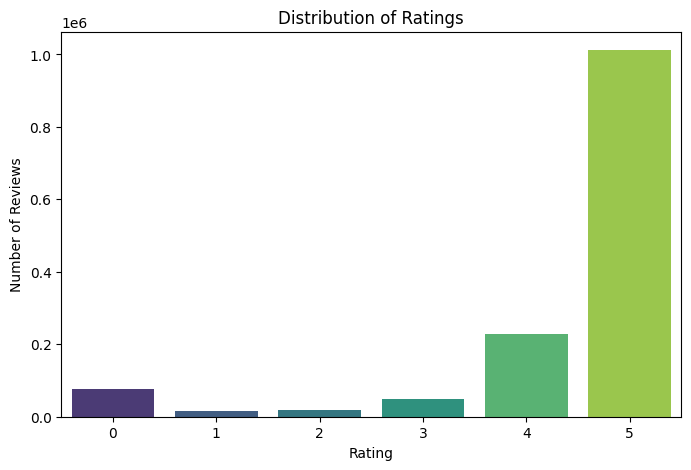

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=reviews, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


How is the distribution of reviews per User and per Recieps

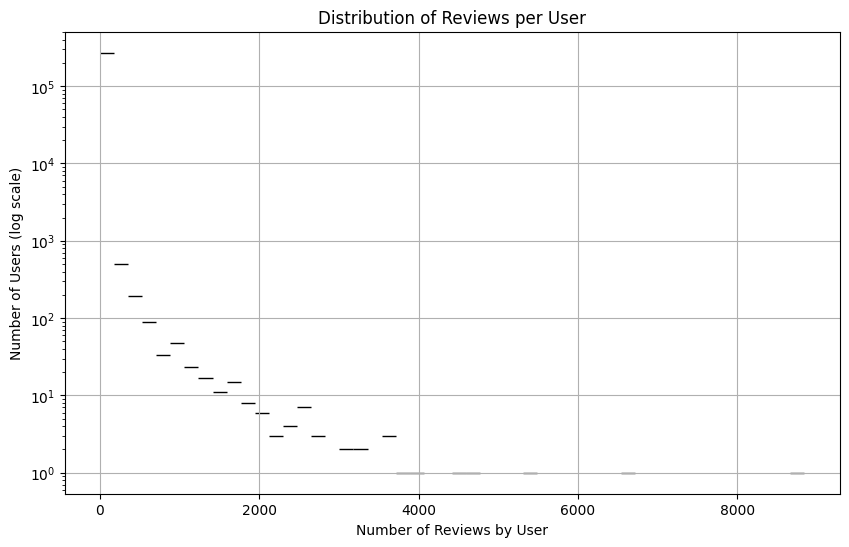

In [19]:
user_review_counts = reviews['AuthorId'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(user_review_counts, bins=50, log_scale=(False, True), color='skyblue')  # Log scale on Y axis
plt.title('Distribution of Reviews per User')
plt.xlabel('Number of Reviews by User')
plt.ylabel('Number of Users (log scale)')
plt.grid(True)
plt.show()

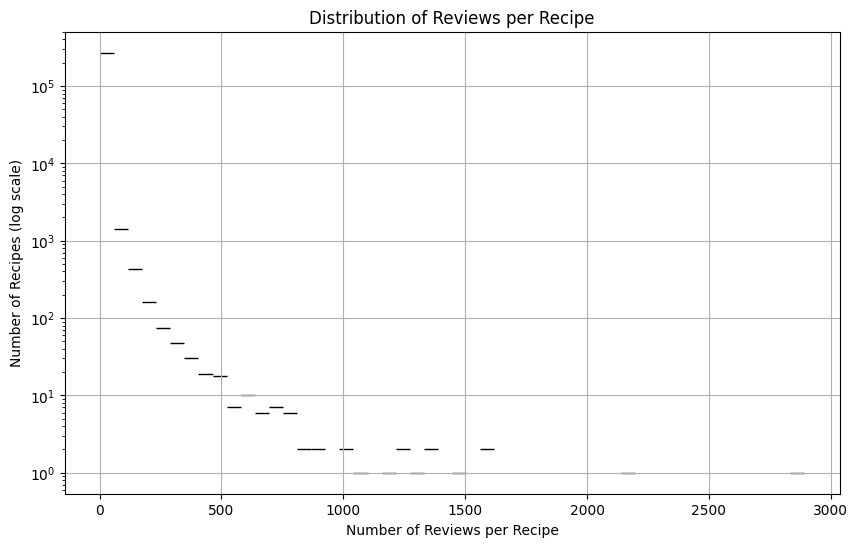

In [20]:
recipe_review_counts = reviews['RecipeId'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(recipe_review_counts, bins=50, log_scale=(False, True), color='orange')  # Log scale on Y
plt.title('Distribution of Reviews per Recipe')
plt.xlabel('Number of Reviews per Recipe')
plt.ylabel('Number of Recipes (log scale)')
plt.grid(True)
plt.show()

In [23]:
print("Reviews per user stats:")
print(user_review_counts.describe())
print("\nReviews per recipe stats:")
print(recipe_review_counts.describe())


Reviews per user stats:
count    271907.000000
mean          5.156109
std          53.468238
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        8842.000000
Name: count, dtype: float64

Reviews per recipe stats:
count    271678.000000
mean          5.160455
std          19.708589
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        2892.000000
Name: count, dtype: float64


How the dataset is filled with the number of reviews over time

/tmp/ipykernel_55621/3324336334.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  reviews_by_date = reviews.groupby(reviews['DateSubmitted'].dt.to_period('M')).size()


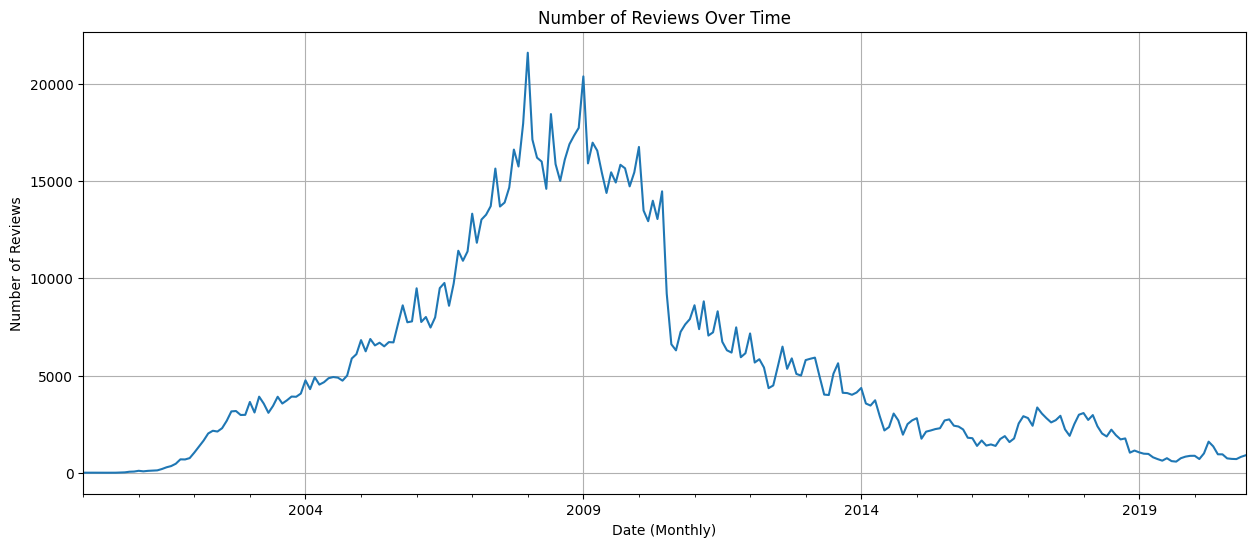

In [13]:
reviews_by_date = reviews.groupby(reviews['DateSubmitted'].dt.to_period('M')).size()

plt.figure(figsize=(15, 6))
reviews_by_date.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date (Monthly)')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


### Let's inspect @k to get a brief view about what would be recommanded with MostPopular algorithms

Who are the top 10 most active reviewers ?

/tmp/ipykernel_55621/1312665161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette='magma')


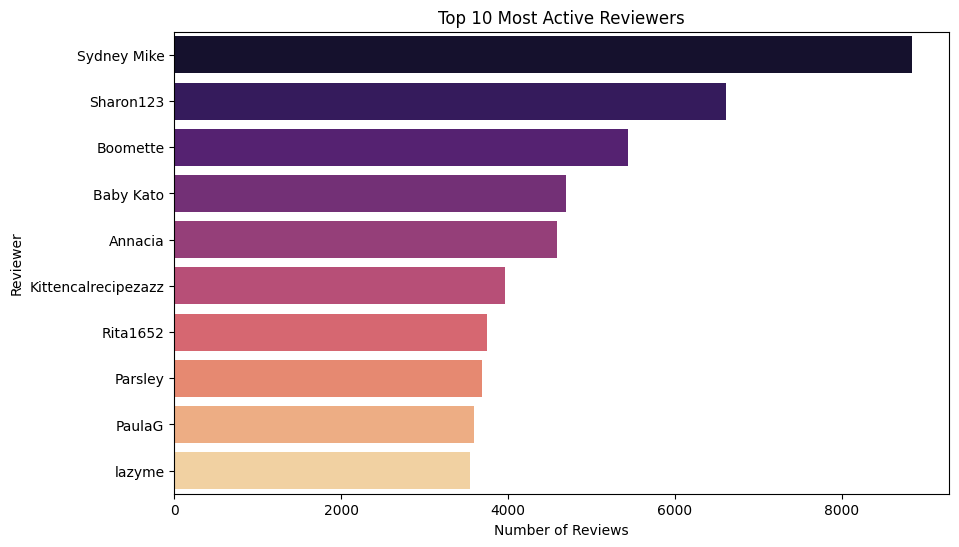

In [12]:
top_reviewers = reviews['AuthorName'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette='magma')
plt.title('Top 10 Most Active Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer')
plt.show()


Top 10 most reviewed recipes

/tmp/ipykernel_55621/1607621725.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_recipes.values, y=recipe_names, palette='cubehelix')


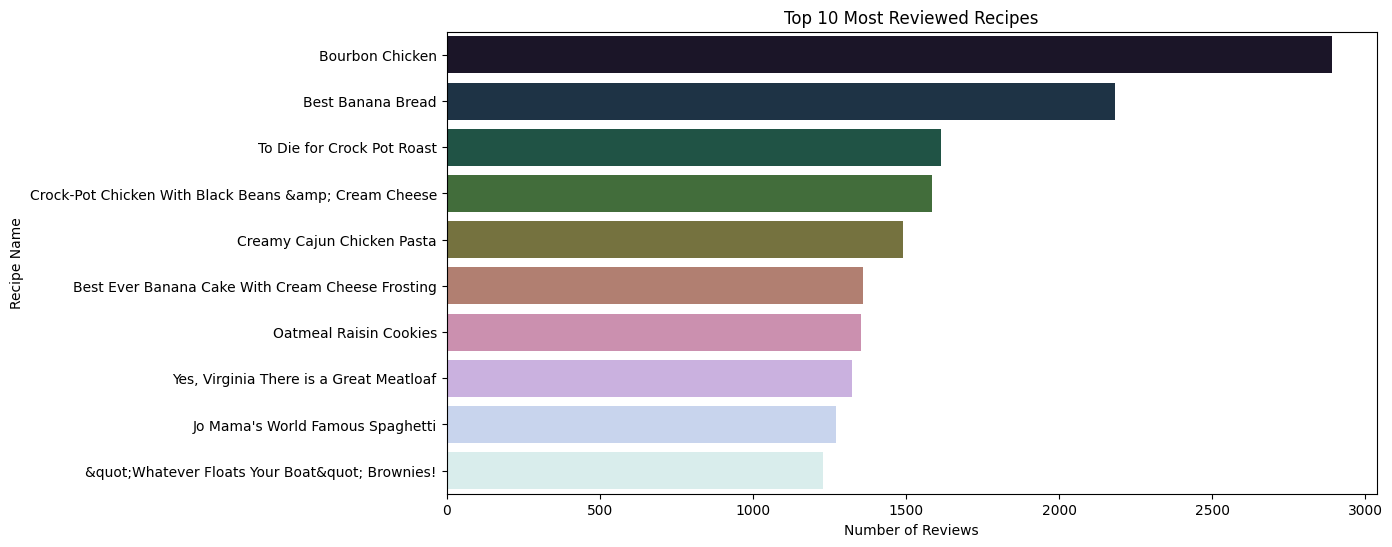

In [14]:
top_recipes = reviews['RecipeId'].value_counts().head(10)
recipe_names = recipes.set_index('RecipeId').loc[top_recipes.index, 'Name']

plt.figure(figsize=(12, 6))
sns.barplot(x=top_recipes.values, y=recipe_names, palette='cubehelix')
plt.title('Top 10 Most Reviewed Recipes')
plt.xlabel('Number of Reviews')
plt.ylabel('Recipe Name')
plt.show()


Top 15 recipe categories by average Rating

/tmp/ipykernel_55621/1120037302.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg_rating.values, y=category_avg_rating.index, palette='coolwarm')


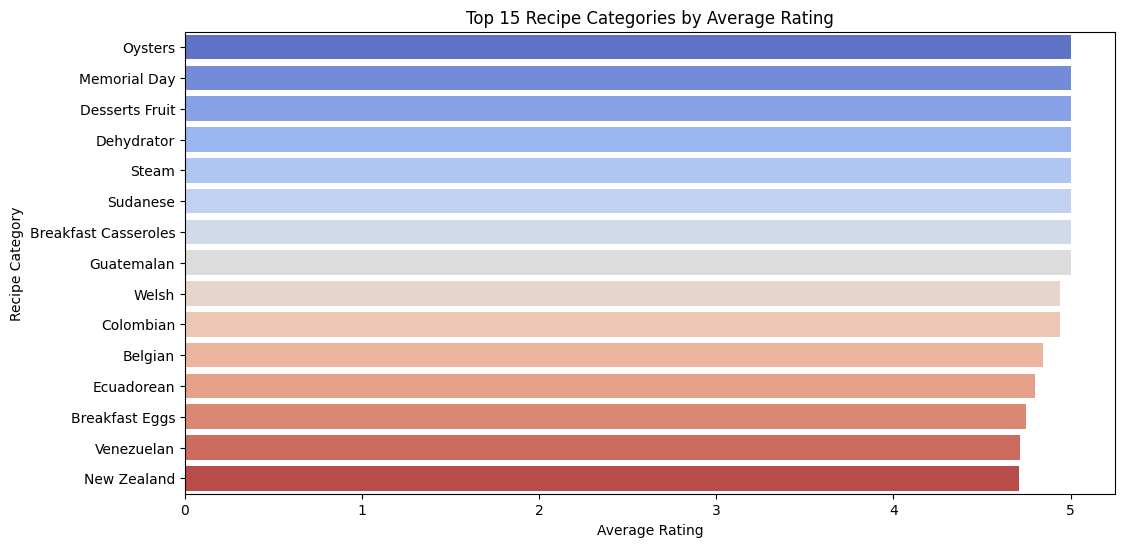

In [21]:
# Some recipes might have multiple categories; handle as needed
recipes_exploded = recipes[['RecipeId', 'RecipeCategory']].dropna()
recipes_exploded = recipes_exploded.explode('RecipeCategory')

merged = pd.merge(reviews[['RecipeId', 'Rating']], recipes_exploded, on='RecipeId')

category_avg_rating = merged.groupby('RecipeCategory')['Rating'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_avg_rating.values, y=category_avg_rating.index, palette='coolwarm')
plt.title('Top 15 Recipe Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Recipe Category')
plt.show()
